In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
%matplotlib inline
from sklearn import datasets

## Loading CSV Data

In [0]:
def load_csv(data, columns=None, header=None):
  data = pd.read_csv(data, header=header)
  if columns != None:
    data.columns = columns
  return data

## Train Test Split

In [0]:
def train_test_split(X, y=None, split_ratio=0.3, random_state=123, stype="separate"):
  np.random.seed(random_state)
  if stype=="separate":
    split = np.random.rand(X.shape[0]) < split_ratio
    return X[~split], X[split], y[~split], y[split]
  elif stype=="whole":
    split = np.random.rand(X.shape[0]) < split_ratio
    return X[~split], X[split] 

## Euclidean Distance

In [0]:
def euclideanDistance(instance1, instance2, length):
  distance = 0
  for x in range(length): 
    distance += np.power((instance1[x] - instance2[x]), 2)
  return np.sqrt(distance)
 

## Getting Neighbours

In [0]:
def getNeighbors(X_train, y_train, X_test, k):
  distances = []
  for x in range(len(X_train)):
    dist = euclideanDistance(X_test, X_train[x], len(X_test))
    distances.append((X_train[x], y_train[x], dist))
  
  distances.sort(key=operator.itemgetter(2))
  neighbors = []
  for x in range(k):
    neighbors.append((distances[x][0], distances[x][1]))
  return neighbors

  

## Finding optimal class

In [0]:
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

## Accuracy Calculation

In [0]:
def getAccuracy(y_test, predictions):
  correct = 0
  y_test = np.array(y_test)
  for x in range(len(y_test)):
    if y_test[x] == predictions[x]:
      correct += 1
  return (correct/float(len(y_test))) * 100.0

In [0]:
def knn_algorithm(X, y, n_neighbors=5):
  model=[]
  model.append(X)
  model.append(y)
  model.append(n_neighbors)
  return model

## Classify Data

In [0]:
def classifyData(X_test, model):
  X_train = np.array(model[0])
  y_train = np.array(model[1])
  k = model[2]
  X_test = np.array(X_test)
  predictions = np.empty(len(X_test), dtype=object)
  for i in range(len(X_test)):
    neighbors = getNeighbors(X_train,y_train,X_test[i],k)
    result = getResponse(neighbors)
    predictions[i] = result

  return predictions

# Data and Plotting

In [10]:
data = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = load_csv(data, columns)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321)

In [0]:
from matplotlib.colors import ListedColormap
colors = ['red', 'blue','green']

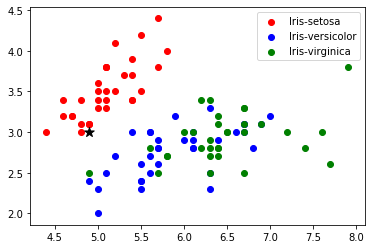

In [88]:
classes=y_train.unique()
plt.scatter(X_train[y_train==classes[0]]["sepal_length"],X_train[y_train==classes[0]]["sepal_width"], c=colors[0], label=classes[0])
plt.scatter(X_train[y_train==classes[1]]["sepal_length"],X_train[y_train==classes[1]]["sepal_width"], c=colors[1], label=classes[1])
plt.scatter(X_train[y_train==classes[2]]["sepal_length"],X_train[y_train==classes[2]]["sepal_width"], c=colors[2], label=classes[2])
plt.scatter(X_test.values[0][0], X_test.values[0][1], marker='*', s=100, c="black")
plt.legend()
plt.show()

The plot shows the data point is closer to *Iris-setosa* as nearest **3** points point the same things. Let's check it

In [99]:
neighbors = getNeighbors(X_train.values,y_train.values,X_test.values[0],3)
result = getResponse(neighbors)
print(result)

Iris-setosa


## Our Model vs Sklearn Model

### Our Model

In [35]:
knn_model = knn_algorithm(X_train, y_train, 3)
predictions = classifyData(X_test, knn_model)
print("Accuracy: ", getAccuracy(y_test, predictions))

Accuracy:  98.0


In [40]:
xx.shape

(185, 6)

### Sklearn Model

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [0]:
sk_knn = KNeighborsClassifier(n_neighbors=3)
sk_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_pred = sk_knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test)*100)

Accuracy:  98.0
